In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import nltk
import string
from string import digits
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from textblob import TextBlob 
import pickle

In [2]:
#********************************************************************************************************************************************************
# below is the vectorized blazing fast cleaner function, just pass the dataframe and sit back and relax
def clean_text_data(df,x,is_lower=True,is_punctuation=True,is_stopwords=True,
                    is_stemming=True,special_symbols=['\n'],verbose=True):
    #stopword removal
    stop_word=list(stopwords.words('english'))
    def remove_stopwords(strr):
        toke=list(strr.split(' '))
        return ' '.join([i for i in toke if i not in stop_word])
    
    #punctutaion removal
    def remove_punctuation(strr):
        t_lator=str.maketrans('','',string.punctuation)
        strr=strr.translate(t_lator)
        remove_digits = str.maketrans('', '', digits)
        strr = strr.translate(remove_digits)
        return strr
    
    #stemming
    def stem_tokens(tokens, stemmer=PorterStemmer()):
        copy=str(tokens)
        try:
            stemmed,tokens = [],list(tokens.split(' '))
            return ' '.join([stemmer.stem(item) for item in tokens])
        except:
            return copy
    
    #removing special symbol
    def remove_special_symbol(strr,pat):
        return strr.replace(pat," ")
    
    #removal of extra whitespaces
    def clean_extra_whitespace(x):
        for i in range(20):
            x=str(x).replace('  ',' ')
            x=x.strip()
        return x

    
    
    #Starting cleaning process
    if verbose:
        print("Starting cleaning process")
        if is_lower:
            print('Converting to lower case')
            df[x]=df[x].str.lower()
        if is_punctuation:
            print('Removing Punctuations')
            df[x]=df[x].apply(lambda y:remove_punctuation(y))
        if is_stopwords:
            print('Removing Stopwords')
            df[x]=df[x].apply(lambda y:remove_stopwords(y))
        if is_stemming:
            print('Stemming')
            df[x]=df[x].apply(lambda y:stem_tokens(y))
        print('Removing ',special_symbols)
        for i in special_symbols:
            df[x]=df[x].apply(lambda y:remove_special_symbol(y,i))
            
        df[x]=df[x].apply(lambda y:clean_extra_whitespace(y))
        print('Text cleaning has been successfully completed')
        return df
    else:
        if is_lower:
            df[x]=df[x].str.lower()
        if is_punctuation:
            df[x]=df[x].apply(lambda y:remove_punctuation(y))
        if is_stopwords:
            df[x]=df[x].apply(lambda y:remove_stopwords(y))
        if is_stemming:
            df[x]=df[x].apply(lambda y:stem_tokens(y))
        for i in special_symbols:
            df[x]=df[x].apply(lambda y:remove_special_symbol(y,i))
        
        df[x]=df[x].apply(lambda y:clean_extra_whitespace(y))
        return df

In [4]:
def num_of_words(x):
    return len(list(str(x).split(' ')))

In [209]:
def prepare_test_data(text=None, tfidf = None, clf=None):
    test = pd.DataFrame()
    test['comment_text'] = [text]
    test=clean_text_data(df=test,x='comment_text',verbose=False)
    test['comment_text_char_length']=[len(i) for i in test['comment_text'].values]
    test['comment_text_word_length']=test['comment_text'].apply(lambda x:num_of_words(x))
    test_data = tfidf.transform(test['comment_text'])
    test_data=pd.DataFrame(test_data.toarray(),index=[0])
    coly = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    ans = np.array(clf.predict_proba(test_data))
    sub = pd.DataFrame([ans[:,0,1]],columns=coly)
    return sub

In [160]:
tfidf = pickle.load(open('../Modeling/tfidf.sav','rb'))
clf = pickle.load(open('../Modeling/model.sav','rb'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.19.1 when using version 0.19.0. This might lead to breaking code or inv

In [223]:
ref = prepare_test_data('german',tfidf=tfidf,clf=clf)

[Parallel(n_jobs=16)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  16 tasks      | elapsed:    0.0s
[Paralle

In [224]:
result = pd.DataFrame(ref.values,columns = ref.columns)

In [236]:
result

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.026707,0.000968,0.012769,0.000147,0.040679,0.007792


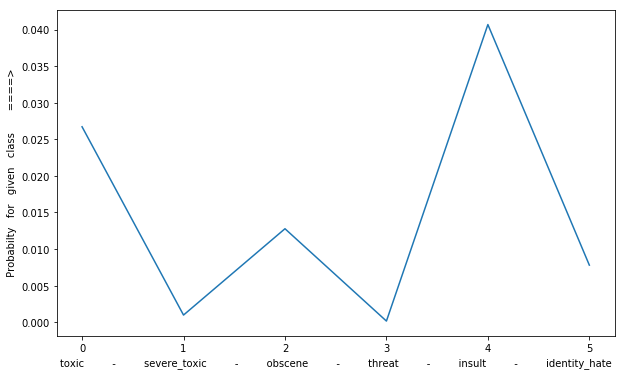

In [258]:
plt.figure(figsize=(10,6))
plt.plot(result.loc[0].values)
plt.xlabel('         -         '.join([i for i in result.columns]))
plt.ylabel(" Probabilty   for   given   class       ====>")
plt.show()